# **Segmenter des clients d'un site e-commerce**

## **Importation du fichier SQL**

In [3]:
# Imports standards (bibliothèques intégrées)
import importlib.metadata
import sqlite3
import sys

# Imports des bibliothèques tierces
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import scipy.stats as st
import seaborn as sns
import sklearn
import statsmodels.api as sm

# Imports spécifiques de sklearn
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder, StandardScaler


In [4]:
# Afficher la version de Python
print("Python version:", sys.version)

# Afficher la version des bibliothèques déjà importées
print('\n'.join(f'{m.__name__} - {m.__version__}'
         for m in globals().values()
         if getattr(m, '__version__', None)))

Python version: 3.12.4 | packaged by Anaconda, Inc. | (main, Jun 18 2024, 15:03:56) [MSC v.1929 64 bit (AMD64)]
json - 2.0.9
pandas - 2.2.2
numpy - 1.26.4
pandas - 2.2.2
seaborn - 0.13.2
sklearn - 1.4.2
statsmodels.api - 0.14.2


In [5]:
conn = sqlite3.connect('olist (1).db')

In [6]:
pd.options.display.max_columns = 40

In [7]:
# Liste des tables
#sqlite_master = contient les informations sur la structure de la BDD ici je demande 
#seulement le nom mais je pourrais aussi demander d'autres caractéristiques.

tables = pd.read_sql_query("SELECT name FROM sqlite_master WHERE type='table';", conn)
print("Tables présentes dans la base :")
print(tables)

Tables présentes dans la base :
              name
0        customers
1           geoloc
2      order_items
3      order_pymts
4    order_reviews
5           orders
6         products
7          sellers
8      translation
9  final_table_rfm


## **Importation du notebook SQL avec la synchronisation SQL / JUPYTER**

In [9]:
# Activer la magie SQL dans Jupyter
%load_ext sql

# Connexion à SQLite
%sql sqlite:///Notebook_SQL.db


#Maintenant je peux écrire mon code SQL avec simplement %sql devant

In [10]:
for table_name in tables['name']:
    print(f"\nAperçu des données de la table '{table_name}':")
    df = pd.read_sql_query(f"SELECT * FROM {table_name} LIMIT 5;", conn)
    display(df)


Aperçu des données de la table 'customers':


,index,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP
1,1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP
2,2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP
3,3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP
4,4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP



Aperçu des données de la table 'geoloc':


,index,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng,geolocation_city,geolocation_state
0,0,1037,-23.545621,-46.639292,sao paulo,SP
1,1,1046,-23.546081,-46.644820,sao paulo,SP
2,2,1046,-23.546129,-46.642951,sao paulo,SP
3,3,1041,-23.544392,-46.639499,sao paulo,SP
4,4,1035,-23.541578,-46.641607,sao paulo,SP



Aperçu des données de la table 'order_items':


,index,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29
1,1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93
2,2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87
3,3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79
4,4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14



Aperçu des données de la table 'order_pymts':


,index,order_id,payment_sequential,payment_type,payment_installments,payment_value
0,0,b81ef226f3fe1789b1e8b2acac839d17,1,credit_card,8,99.33
1,1,a9810da82917af2d9aefd1278f1dcfa0,1,credit_card,1,24.39
2,2,25e8ea4e93396b6fa0d3dd708e76c1bd,1,credit_card,1,65.71
3,3,ba78997921bbcdc1373bb41e913ab953,1,credit_card,8,107.78
4,4,42fdf880ba16b47b59251dd489d4441a,1,credit_card,2,128.45



Aperçu des données de la table 'order_reviews':


,index,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
0,0,7bc2406110b926393aa56f80a40eba40,73fc7af87114b39712e6da79b0a377eb,4,None,None,2018-01-18 00:00:00,2018-01-18 21:46:59
1,1,80e641a11e56f04c1ad469d5645fdfde,a548910a1c6147796b98fdf73dbeba33,5,None,None,2018-03-10 00:00:00,2018-03-11 03:05:13
2,2,228ce5500dc1d8e020d8d1322874b6f0,f9e4b658b201a9f2ecdecbb34bed034b,5,None,None,2018-02-17 00:00:00,2018-02-18 14:36:24
3,3,e64fb393e7b32834bb789ff8bb30750e,658677c97b385a9be170737859d3511b,5,None,Recebi bem antes do prazo estipulado.,2017-04-21 00:00:00,2017-04-21 22:02:06
4,4,f7c4243c7fe1938f181bec41a392bdeb,8e6bfb81e283fa7e4f11123a3fb894f1,5,None,Parabéns lojas lannister adorei comprar pela I...,2018-03-01 00:00:00,2018-03-02 10:26:53



Aperçu des données de la table 'orders':


,index,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00
1,1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00
2,2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00
3,3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00
4,4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00



Aperçu des données de la table 'products':


,index,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,40.0,287.0,1.0,225.0,16.0,10.0,14.0
1,1,3aa071139cb16b67ca9e5dea641aaa2f,artes,44.0,276.0,1.0,1000.0,30.0,18.0,20.0
2,2,96bd76ec8810374ed1b65e291975717f,esporte_lazer,46.0,250.0,1.0,154.0,18.0,9.0,15.0
3,3,cef67bcfe19066a932b7673e239eb23d,bebes,27.0,261.0,1.0,371.0,26.0,4.0,26.0
4,4,9dc1a7de274444849c219cff195d0b71,utilidades_domesticas,37.0,402.0,4.0,625.0,20.0,17.0,13.0



Aperçu des données de la table 'sellers':


,index,seller_id,seller_zip_code_prefix,seller_city,seller_state
0,0,3442f8959a84dea7ee197c632cb2df15,13023,campinas,SP
1,1,d1b65fc7debc3361ea86b5f14c68d2e2,13844,mogi guacu,SP
2,2,ce3ad9de960102d0677a81f5d0bb7b2d,20031,rio de janeiro,RJ
3,3,c0f3eea2e14555b6faeea3dd58c1b1c3,4195,sao paulo,SP
4,4,51a04a8a6bdcb23deccc82b0b80742cf,12914,braganca paulista,SP



Aperçu des données de la table 'translation':


,index,product_category_name,product_category_name_english
0,0,beleza_saude,health_beauty
1,1,informatica_acessorios,computers_accessories
2,2,automotivo,auto
3,3,cama_mesa_banho,bed_bath_table
4,4,moveis_decoracao,furniture_decor



Aperçu des données de la table 'final_table_rfm':


,index,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,order_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_customer_date,order_estimated_delivery_date,product_id,seller_id,price,freight_value,payment_type,payment_installments,payment_value,review_id,review_score,review_creation_date,product_category_name,product_category_name_english,seller_city,seller_state,seller_zip_code_prefix,recency,frequency,monetary
0,0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP,00e7ee1b050b8499577073aeb2a297a1,delivered,2017-05-16 15:05:35,2017-05-16 15:22:12,2017-05-25 10:35:35,2017-06-05 00:00:00,a9516a079e37a9c9c36b9b78b10169e8,7c67e1448b00f6e969d365cea6b010ab,124.99,21.88,credit_card,2,146.87,88b8b52d46df026a9d1ad2136a59b30b,4,2017-05-26 00:00:00,moveis_escritorio,office_furniture,itaquaquecetuba,SP,8577,518,1,146.87
1,1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP,29150127e6685892b6eab3eec79f59c7,delivered,2018-01-12 20:48:24,2018-01-12 20:58:32,2018-01-29 12:41:19,2018-02-06 00:00:00,4aa6014eceb682077f9dc4bffebc05b0,b8bc237ba3788b23da09c0f1f3a3288c,289.00,46.48,credit_card,8,335.48,02fc48a9efa3e3d0f1a8ea26507eeec3,5,2018-01-30 00:00:00,utilidades_domesticas,housewares,itajai,SC,88303,277,1,335.48
2,2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP,b2059ed67ce144a36e2aa97d2c9e9ad2,delivered,2018-05-19 16:07:45,2018-05-20 16:19:10,2018-06-14 17:58:51,2018-06-13 00:00:00,bd07b66896d6f1494f5b86251848ced7,7c67e1448b00f6e969d365cea6b010ab,139.94,17.79,credit_card,7,157.73,5ad6695d76ee186dc473c42706984d87,5,2018-06-15 00:00:00,moveis_escritorio,office_furniture,itaquaquecetuba,SP,8577,150,1,157.73
3,3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP,951670f92359f4fe4a63112aa7306eba,delivered,2018-03-13 16:06:38,2018-03-13 17:29:19,2018-03-28 16:04:25,2018-04-10 00:00:00,a5647c44af977b148e0a3a4751a09e2e,7c67e1448b00f6e969d365cea6b010ab,149.94,23.36,credit_card,1,173.30,059a801bb31f6aab2266e672cab87bc5,5,2018-03-29 00:00:00,moveis_escritorio,office_furniture,itaquaquecetuba,SP,8577,217,1,173.30
4,4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP,6b7d50bd145f6fc7f33cebabd7e49d0f,delivered,2018-07-29 09:51:30,2018-07-29 10:10:09,2018-08-09 20:55:48,2018-08-15 00:00:00,9391a573abe00141c56e38d84d7d5b3b,4a3ca9315b744ce9f8e9374361493884,230.00,22.25,credit_card,8,252.25,8490879d58d6c5d7773f2739a03f089a,5,2018-08-10 00:00:00,casa_conforto,home_confort,ibitinga,SP,14940,79,1,252.25


## *Chargement de toutes les tables en DF*

### *Table CUSTOMERS*

In [13]:
# Charger la table customers dans un DataFrame
customers_df = pd.read_sql_query("SELECT * FROM customers;", conn)

In [14]:
display(customers_df.shape)

(99441, 6)

In [15]:
display(customers_df.dtypes)

index                        int64
customer_id                 object
customer_unique_id          object
customer_zip_code_prefix     int64
customer_city               object
customer_state              object
dtype: object

In [16]:
display(customers_df.head())

,index,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP
1,1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP
2,2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP
3,3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP
4,4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP


### *Table GEOLOC*

In [18]:
# Charger la table geoloc dans un DataFrame
geoloc_df = pd.read_sql_query("SELECT * FROM geoloc;", conn)

In [19]:
display(geoloc_df.shape)

(1000163, 6)

In [20]:
display(geoloc_df.dtypes)

index                            int64
geolocation_zip_code_prefix      int64
geolocation_lat                float64
geolocation_lng                float64
geolocation_city                object
geolocation_state               object
dtype: object

In [21]:
display(geoloc_df.tail())

,index,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng,geolocation_city,geolocation_state
1000158,1000158,99950,-28.068639,-52.010705,tapejara,RS
1000159,1000159,99900,-27.877125,-52.224882,getulio vargas,RS
1000160,1000160,99950,-28.071855,-52.014716,tapejara,RS
1000161,1000161,99980,-28.388932,-51.846871,david canabarro,RS
1000162,1000162,99950,-28.070104,-52.018658,tapejara,RS


### *Table ORDER_ITEMS*

In [23]:
# Charger la table order_items dans un DataFrame
order_items_df = pd.read_sql_query("SELECT * FROM order_items;", conn)

In [24]:
display(order_items_df.shape)

(112650, 8)

In [25]:
display(order_items_df.dtypes)

index                    int64
order_id                object
order_item_id            int64
product_id              object
seller_id               object
shipping_limit_date     object
price                  float64
freight_value          float64
dtype: object

In [26]:
display(order_items_df.head())

,index,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29
1,1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93
2,2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87
3,3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79
4,4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14


### *Table ORDER_PYMTS*

In [28]:
# Charger la table order_pymts dans un DataFrame
order_pymts_df = pd.read_sql_query("SELECT * FROM order_pymts;", conn)

In [29]:
display(order_pymts_df.shape)

(103886, 6)

In [30]:
display(order_pymts_df.dtypes)

index                     int64
order_id                 object
payment_sequential        int64
payment_type             object
payment_installments      int64
payment_value           float64
dtype: object

In [31]:
display(order_pymts_df.head())

,index,order_id,payment_sequential,payment_type,payment_installments,payment_value
0,0,b81ef226f3fe1789b1e8b2acac839d17,1,credit_card,8,99.33
1,1,a9810da82917af2d9aefd1278f1dcfa0,1,credit_card,1,24.39
2,2,25e8ea4e93396b6fa0d3dd708e76c1bd,1,credit_card,1,65.71
3,3,ba78997921bbcdc1373bb41e913ab953,1,credit_card,8,107.78
4,4,42fdf880ba16b47b59251dd489d4441a,1,credit_card,2,128.45


### *Table ORDER_REVIEWS*

In [33]:
# Charger la table order_reviews dans un DataFrame
order_reviews_df = pd.read_sql_query("SELECT * FROM order_reviews;", conn)

In [34]:
display(order_reviews_df.shape)

(99224, 8)

In [35]:
display(order_reviews_df.dtypes)

index                       int64
review_id                  object
order_id                   object
review_score                int64
review_comment_title       object
review_comment_message     object
review_creation_date       object
review_answer_timestamp    object
dtype: object

In [36]:
display(order_reviews_df.tail())

,index,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
99219,99219,574ed12dd733e5fa530cfd4bbf39d7c9,2a8c23fee101d4d5662fa670396eb8da,5,None,None,2018-07-07 00:00:00,2018-07-14 17:18:30
99220,99220,f3897127253a9592a73be9bdfdf4ed7a,22ec9f0669f784db00fa86d035cf8602,5,None,None,2017-12-09 00:00:00,2017-12-11 20:06:42
99221,99221,b3de70c89b1510c4cd3d0649fd302472,55d4004744368f5571d1f590031933e4,5,None,"Excelente mochila, entrega super rápida. Super...",2018-03-22 00:00:00,2018-03-23 09:10:43
99222,99222,1adeb9d84d72fe4e337617733eb85149,7725825d039fc1f0ceb7635e3f7d9206,4,None,None,2018-07-01 00:00:00,2018-07-02 12:59:13
99223,99223,efe49f1d6f951dd88b51e6ccd4cc548f,90531360ecb1eec2a1fbb265a0db0508,1,None,"meu produto chegou e ja tenho que devolver, po...",2017-07-03 00:00:00,2017-07-03 21:01:49


### *Table ORDERS*

In [38]:
# Charger la table orders dans un DataFrame
orders_df = pd.read_sql_query("SELECT * FROM orders;", conn)

In [39]:
display(orders_df.shape)

(99441, 9)

In [40]:
display(orders_df.dtypes)

index                             int64
order_id                         object
customer_id                      object
order_status                     object
order_purchase_timestamp         object
order_approved_at                object
order_delivered_carrier_date     object
order_delivered_customer_date    object
order_estimated_delivery_date    object
dtype: object

In [41]:
display(orders_df.head())

,index,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00
1,1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00
2,2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00
3,3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00
4,4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00


### *Table PRODUCTS*

In [43]:
# Charger la table products dans un DataFrame
products_df = pd.read_sql_query("SELECT * FROM products;", conn)

In [44]:
display(products_df.shape)

(32951, 10)

In [45]:
display(products_df.dtypes)

index                           int64
product_id                     object
product_category_name          object
product_name_lenght           float64
product_description_lenght    float64
product_photos_qty            float64
product_weight_g              float64
product_length_cm             float64
product_height_cm             float64
product_width_cm              float64
dtype: object

In [46]:
display(products_df.tail())

,index,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
32946,32946,a0b7d5a992ccda646f2d34e418fff5a0,moveis_decoracao,45.0,67.0,2.0,12300.0,40.0,40.0,40.0
32947,32947,bf4538d88321d0fd4412a93c974510e6,construcao_ferramentas_iluminacao,41.0,971.0,1.0,1700.0,16.0,19.0,16.0
32948,32948,9a7c6041fa9592d9d9ef6cfe62a71f8c,cama_mesa_banho,50.0,799.0,1.0,1400.0,27.0,7.0,27.0
32949,32949,83808703fc0706a22e264b9d75f04a2e,informatica_acessorios,60.0,156.0,2.0,700.0,31.0,13.0,20.0
32950,32950,106392145fca363410d287a815be6de4,cama_mesa_banho,58.0,309.0,1.0,2083.0,12.0,2.0,7.0


### *Table SELLERS*

In [48]:
# Charger la table sellers dans un DataFrame
sellers_df = pd.read_sql_query("SELECT * FROM sellers;", conn)

In [49]:
display(sellers_df.shape)

(3095, 5)

In [50]:
display(sellers_df.dtypes)

index                      int64
seller_id                 object
seller_zip_code_prefix     int64
seller_city               object
seller_state              object
dtype: object

In [51]:
display(sellers_df.head())

,index,seller_id,seller_zip_code_prefix,seller_city,seller_state
0,0,3442f8959a84dea7ee197c632cb2df15,13023,campinas,SP
1,1,d1b65fc7debc3361ea86b5f14c68d2e2,13844,mogi guacu,SP
2,2,ce3ad9de960102d0677a81f5d0bb7b2d,20031,rio de janeiro,RJ
3,3,c0f3eea2e14555b6faeea3dd58c1b1c3,4195,sao paulo,SP
4,4,51a04a8a6bdcb23deccc82b0b80742cf,12914,braganca paulista,SP


### *Table TRANSLATION*

In [53]:
# Charger la table translation dans un DataFrame
translation_df = pd.read_sql_query("SELECT * FROM translation;", conn)

In [54]:
display(translation_df.shape)

(71, 3)

In [55]:
display(translation_df.dtypes)

index                             int64
product_category_name            object
product_category_name_english    object
dtype: object

In [56]:
display(translation_df.tail())

,index,product_category_name,product_category_name_english
66,66,flores,flowers
67,67,artes_e_artesanato,arts_and_craftmanship
68,68,fraldas_higiene,diapers_and_hygiene
69,69,fashion_roupa_infanto_juvenil,fashion_childrens_clothes
70,70,seguros_e_servicos,security_and_services


### *Table finale RFM*

In [58]:
# Charger la table translation dans un DataFrame
table_final_rfm_df = pd.read_sql_query("SELECT * FROM final_table_rfm;", conn)

In [59]:
display(table_final_rfm_df.shape)

(119143, 30)

In [60]:
display(table_final_rfm_df.dtypes)

index                              int64
customer_id                       object
customer_unique_id                object
customer_zip_code_prefix           int64
customer_city                     object
customer_state                    object
order_id                          object
order_status                      object
order_purchase_timestamp          object
order_approved_at                 object
order_delivered_customer_date     object
order_estimated_delivery_date     object
product_id                        object
seller_id                         object
price                            float64
freight_value                    float64
payment_type                      object
payment_installments             float64
payment_value                    float64
review_id                         object
review_score                     float64
review_creation_date              object
product_category_name             object
product_category_name_english     object
seller_city     

In [61]:
# Conversion en datetime64
table_final_rfm_df['order_delivered_customer_date'] = pd.to_datetime(table_final_rfm_df['order_delivered_customer_date'])
table_final_rfm_df['order_estimated_delivery_date'] = pd.to_datetime(table_final_rfm_df['order_estimated_delivery_date'])
table_final_rfm_df['order_purchase_timestamp'] = pd.to_datetime(table_final_rfm_df['order_purchase_timestamp'])
table_final_rfm_df['review_creation_date'] = pd.to_datetime(table_final_rfm_df['review_creation_date'])

# Supprimer l'heure en normalisant à minuit (00:00:00) tout en gardant datetime64
table_final_rfm_df['order_delivered_customer_date'] = table_final_rfm_df['order_delivered_customer_date'].dt.normalize()
table_final_rfm_df['order_estimated_delivery_date'] = table_final_rfm_df['order_estimated_delivery_date'].dt.normalize()
table_final_rfm_df['order_purchase_timestamp'] = table_final_rfm_df['order_purchase_timestamp'].dt.normalize()
table_final_rfm_df['review_creation_date'] = table_final_rfm_df['review_creation_date'].dt.normalize()

In [62]:
display(table_final_rfm_df.head())

,index,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,order_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_customer_date,order_estimated_delivery_date,product_id,seller_id,price,freight_value,payment_type,payment_installments,payment_value,review_id,review_score,review_creation_date,product_category_name,product_category_name_english,seller_city,seller_state,seller_zip_code_prefix,recency,frequency,monetary
0,0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP,00e7ee1b050b8499577073aeb2a297a1,delivered,2017-05-16,2017-05-16 15:22:12,2017-05-25,2017-06-05,a9516a079e37a9c9c36b9b78b10169e8,7c67e1448b00f6e969d365cea6b010ab,124.99,21.88,credit_card,2.0,146.87,88b8b52d46df026a9d1ad2136a59b30b,4.0,2017-05-26,moveis_escritorio,office_furniture,itaquaquecetuba,SP,8577.0,518,1,146.87
1,1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP,29150127e6685892b6eab3eec79f59c7,delivered,2018-01-12,2018-01-12 20:58:32,2018-01-29,2018-02-06,4aa6014eceb682077f9dc4bffebc05b0,b8bc237ba3788b23da09c0f1f3a3288c,289.00,46.48,credit_card,8.0,335.48,02fc48a9efa3e3d0f1a8ea26507eeec3,5.0,2018-01-30,utilidades_domesticas,housewares,itajai,SC,88303.0,277,1,335.48
2,2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP,b2059ed67ce144a36e2aa97d2c9e9ad2,delivered,2018-05-19,2018-05-20 16:19:10,2018-06-14,2018-06-13,bd07b66896d6f1494f5b86251848ced7,7c67e1448b00f6e969d365cea6b010ab,139.94,17.79,credit_card,7.0,157.73,5ad6695d76ee186dc473c42706984d87,5.0,2018-06-15,moveis_escritorio,office_furniture,itaquaquecetuba,SP,8577.0,150,1,157.73
3,3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP,951670f92359f4fe4a63112aa7306eba,delivered,2018-03-13,2018-03-13 17:29:19,2018-03-28,2018-04-10,a5647c44af977b148e0a3a4751a09e2e,7c67e1448b00f6e969d365cea6b010ab,149.94,23.36,credit_card,1.0,173.30,059a801bb31f6aab2266e672cab87bc5,5.0,2018-03-29,moveis_escritorio,office_furniture,itaquaquecetuba,SP,8577.0,217,1,173.30
4,4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP,6b7d50bd145f6fc7f33cebabd7e49d0f,delivered,2018-07-29,2018-07-29 10:10:09,2018-08-09,2018-08-15,9391a573abe00141c56e38d84d7d5b3b,4a3ca9315b744ce9f8e9374361493884,230.00,22.25,credit_card,8.0,252.25,8490879d58d6c5d7773f2739a03f089a,5.0,2018-08-10,casa_conforto,home_confort,ibitinga,SP,14940.0,79,1,252.25


In [63]:
display(table_final_rfm_df.dtypes)

index                                     int64
customer_id                              object
customer_unique_id                       object
customer_zip_code_prefix                  int64
customer_city                            object
customer_state                           object
order_id                                 object
order_status                             object
order_purchase_timestamp         datetime64[ns]
order_approved_at                        object
order_delivered_customer_date    datetime64[ns]
order_estimated_delivery_date    datetime64[ns]
product_id                               object
seller_id                                object
price                                   float64
freight_value                           float64
payment_type                             object
payment_installments                    float64
payment_value                           float64
review_id                                object
review_score                            

## *Valeurs aberrantes*

In [65]:
variables_numeriques= ['price',
                       'freight_value',
                       'payment_installments',
                       'review_score',
                       'payment_value',
                       'recency', 
                       'frequency', 
                       'monetary']

variables_qualitatives= ['order_status', 
                         'payment_type', 
                         'product_category_name_english'] 
                         
variables_dates= ['order_purchase_timestamp', 
                  'order_delivered_customer_date', 
                  'order_estimated_delivery_date', 
                  'review_creation_date'] 

In [66]:
# Analyse des variables numériques
table_final_rfm_df[variables_numeriques].describe()

,price,freight_value,payment_installments,review_score,payment_value,recency,frequency,monetary
count,118310.000000,118310.000000,119140.000000,118146.000000,119140.000000,119143.000000,119143.000000,119140.000000
mean,120.646603,20.032387,2.941246,4.015582,172.735135,287.723693,1.091126,383.710162
std,184.109691,15.836850,2.777848,1.400436,267.776077,153.353346,0.410960,1669.241753
min,0.850000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000
25%,39.900000,13.080000,1.000000,4.000000,60.850000,163.000000,1.000000,70.720000
50%,74.900000,16.280000,2.000000,5.000000,108.160000,268.000000,1.000000,135.170000
75%,134.900000,21.180000,4.000000,5.000000,189.240000,397.000000,1.000000,283.205000
max,6735.000000,409.680000,24.000000,5.000000,13664.080000,772.000000,17.000000,109312.640000


In [67]:
# Analyse des variables qualitatives
for col in variables_qualitatives:
    print(f"Valeurs uniques de {col} :")
    print(table_final_rfm_df[col].value_counts())
    print("\n" + "-"*50 + "\n")

Valeurs uniques de order_status :
order_status
delivered      115723
shipped          1256
canceled          750
unavailable       652
invoiced          378
processing        376
created             5
approved            3
Name: count, dtype: int64

--------------------------------------------------

Valeurs uniques de payment_type :
payment_type
credit_card    87776
boleto         23190
voucher         6465
debit_card      1706
not_defined        3
Name: count, dtype: int64

--------------------------------------------------

Valeurs uniques de product_category_name_english :
product_category_name_english
bed_bath_table               11988
health_beauty                10032
sports_leisure                9004
furniture_decor               8832
computers_accessories         8150
                             ...  
arts_and_craftmanship           24
la_cuisine                      16
cds_dvds_musicals               14
fashion_childrens_clothes        8
security_and_services            2
N

In [68]:
# Pour éviter la troncature et s'assurer qu'il n'y a pas d'outliers
pd.set_option('display.max_rows', None)
display(table_final_rfm_df['product_category_name_english'].value_counts())
pd.reset_option('display.max_rows')  # Réinitialise l'option après affichage

product_category_name_english
bed_bath_table                             11988
health_beauty                              10032
sports_leisure                              9004
furniture_decor                             8832
computers_accessories                       8150
housewares                                  7380
watches_gifts                               6213
telephony                                   4726
garden_tools                                4590
auto                                        4400
toys                                        4281
cool_stuff                                  3999
perfumery                                   3589
baby                                        3204
electronics                                 2846
stationery                                  2625
fashion_bags_accessories                    2170
pet_shop                                    2030
office_furniture                            1788
consoles_games                         

In [69]:
# Analyse des variables de type date
table_final_rfm_df[variables_dates].agg(['min', 'max'])

,order_purchase_timestamp,order_delivered_customer_date,order_estimated_delivery_date,review_creation_date
min,2016-09-04,2016-10-11,2016-09-30,2016-10-02
max,2018-10-17,2018-10-17,2018-11-12,2018-08-31


## *Valeurs manquantes*

In [71]:
display(table_final_rfm_df.isna().mean() * 100)

index                            0.000000
customer_id                      0.000000
customer_unique_id               0.000000
customer_zip_code_prefix         0.000000
customer_city                    0.000000
customer_state                   0.000000
order_id                         0.000000
order_status                     0.000000
order_purchase_timestamp         0.000000
order_approved_at                0.148561
order_delivered_customer_date    2.871339
order_estimated_delivery_date    0.000000
product_id                       0.699160
seller_id                        0.699160
price                            0.699160
freight_value                    0.699160
payment_type                     0.002518
payment_installments             0.002518
payment_value                    0.002518
review_id                        0.836810
review_score                     0.836810
review_creation_date             0.836810
product_category_name            2.133571
product_category_name_english    2

Méthode: 

- Order_delivered_customer_date: si commande a un statut livré alors remplace la date par la date estimée de livraison. Laisse pour le moment en NaT pour les valeurs non dispo, je les gérerai lors de ma création de features. 
  
- Pour les colonnes suivantes: product_id', 'seller_id', 'product_category_name', 'product_category_name_english','seller_city', 'seller_state', 'seller_zip_code_prefix', 'price' et 'freight_value'. Remplace par "Absent" pour les valeurs catégorielles et "0" pour les variables numériques.

- Pour les colonnes paiements: payment_type = not_defined lorsque valeurs NaN, payment_installments = 0 car sûrement pas d'échelonnage et payment_value= price + freight_value. J'en profite pour remplacer les 3 valeurs manquantes monetary qui est égal à payment_values puisque le client n'a passé qu'une commande. 

- Pour les reviews: review_id création de valeurs NaN car il y a des commandes où les clients n'ont pas laissé d'avis. Remplace par Absent les NaN review_id, review_score, review_creation_date

#### 1. Order_delivered_customer_date

In [74]:
display(table_final_rfm_df['order_delivered_customer_date'].isna().sum())

3421

In [75]:
print(table_final_rfm_df.loc[table_final_rfm_df['order_delivered_customer_date'].isna()& 
    (table_final_rfm_df['order_status'] == 'delivered')])

        index                       customer_id  \
10870    9034  5e89028e024b381dc84a13a3570decb4   
14421   12030  28c37425f1127d887d7337f284080a0f   
16044   13357  29f0540231702fda0cfdee0a310f11aa   
61956   51668  ec05a6d8558c6455f0cbbd8a420ad34f   
102388  85377  dd1b84a7286eb4524d52af4256c0ba24   
104571  87172  cfda40ca8dd0a5d486a9635b611b398a   
106953  89194  4f1d63d35fb7c8999853b2699f5c7649   
117018  97677  e08caf668d499a6d643dafd7c5cc498a   

                      customer_unique_id  customer_zip_code_prefix  \
10870   2f17c5b324ad603491521b279a9ff4de                     18255   
14421   175378436e2978be55b8f4316bce4811                      9431   
16044   1bd06a0c0df8b23dacfd3725d2dc0bb9                     12445   
61956   13467e882eb3a701826435ee4424f2bd                     18520   
102388  cce5e8188bf42ffb3bb5b18ff58f5965                      7261   
104571  3bc508d482a402715be4d5cf4020cc81                     13170   
106953  ebf7e0d43a78c81991a4c59c145c75db          

In [76]:
table_final_rfm_df.loc[table_final_rfm_df['order_delivered_customer_date'].isna() & 
    (table_final_rfm_df['order_status'] == 'delivered'),
    'order_delivered_customer_date'] = table_final_rfm_df['order_estimated_delivery_date']

In [77]:
print(table_final_rfm_df['order_delivered_customer_date'].isna().mean() * 100)

2.8646248625601167


In [78]:
table_final_rfm_df.loc[table_final_rfm_df['order_delivered_customer_date'].isna(), 
    'order_delivered_customer_date'] = pd.NaT

In [79]:
print(table_final_rfm_df.loc
    [table_final_rfm_df['customer_unique_id'] == '233896de79986082f1f479f1f85281cb'])

    index                       customer_id                customer_unique_id  \
52     46  f34a6e874087ec1f0e3dab9fdf659c5d  233896de79986082f1f479f1f85281cb   

    customer_zip_code_prefix customer_city customer_state  \
52                     38300     ituiutaba             MG   

                            order_id order_status order_purchase_timestamp  \
52  6e98de3a85c84ead6689189b825d35b5     canceled               2018-03-15   

      order_approved_at order_delivered_customer_date  \
52  2018-03-15 10:29:33                           NaT   

   order_estimated_delivery_date product_id seller_id  price  freight_value  \
52                    2018-04-09       None      None    NaN            NaN   

   payment_type  payment_installments  payment_value  \
52  credit_card                   1.0          73.16   

                           review_id  review_score review_creation_date  \
52  e76cda681b681b65fffa28dfc0030641           1.0           2018-04-11   

   product_category

In [80]:
print(table_final_rfm_df['order_delivered_customer_date'].isna().mean() * 100)

2.8646248625601167


#### 2. Product_id

In [82]:
print(table_final_rfm_df['product_id'].isna().sum())

833


In [83]:
table_final_rfm_df[['product_id',
                    'seller_id',
                    'product_category_name',
                    'product_category_name_english',
                    'seller_city',
                    'seller_state',
                    'seller_zip_code_prefix']] = table_final_rfm_df[['product_id',
                                                                     'seller_id',
                                                                     'product_category_name',
                                                                     'product_category_name_english',
                                                                     'seller_city', 'seller_state',
                                                                     'seller_zip_code_prefix']].fillna('Absent')

In [84]:
table_final_rfm_df[['price', 'freight_value']] = table_final_rfm_df[['price', 'freight_value']].fillna(0)

In [85]:
print(table_final_rfm_df.isna().mean() * 100)

index                            0.000000
customer_id                      0.000000
customer_unique_id               0.000000
customer_zip_code_prefix         0.000000
customer_city                    0.000000
customer_state                   0.000000
order_id                         0.000000
order_status                     0.000000
order_purchase_timestamp         0.000000
order_approved_at                0.148561
order_delivered_customer_date    2.864625
order_estimated_delivery_date    0.000000
product_id                       0.000000
seller_id                        0.000000
price                            0.000000
freight_value                    0.000000
payment_type                     0.002518
payment_installments             0.002518
payment_value                    0.002518
review_id                        0.836810
review_score                     0.836810
review_creation_date             0.836810
product_category_name            0.000000
product_category_name_english    0

#### 3. Payment

In [87]:
print(table_final_rfm_df['payment_type'].isna().sum())

3


In [88]:
table_final_rfm_df[['payment_type']] = table_final_rfm_df[['payment_type']].fillna('not_defined')

In [89]:
table_final_rfm_df[['payment_installments']] = table_final_rfm_df[['payment_installments']].fillna(0)

In [90]:
print(table_final_rfm_df.loc[table_final_rfm_df['payment_value'].isna()])

       index                       customer_id  \
25365  21125  86dc2ffce2dfff336de2f386a786e574   
25366  21125  86dc2ffce2dfff336de2f386a786e574   
25367  21125  86dc2ffce2dfff336de2f386a786e574   

                     customer_unique_id  customer_zip_code_prefix  \
25365  830d5b7aaa3b6f1e9ad63703bec97d23                     14600   
25366  830d5b7aaa3b6f1e9ad63703bec97d23                     14600   
25367  830d5b7aaa3b6f1e9ad63703bec97d23                     14600   

              customer_city customer_state                          order_id  \
25365  sao joaquim da barra             SP  bfbd0f9bdef84302105ad712db648a6c   
25366  sao joaquim da barra             SP  bfbd0f9bdef84302105ad712db648a6c   
25367  sao joaquim da barra             SP  bfbd0f9bdef84302105ad712db648a6c   

      order_status order_purchase_timestamp    order_approved_at  \
25365    delivered               2016-09-15  2016-09-15 12:16:38   
25366    delivered               2016-09-15  2016-09-15 12:16:38 

In [91]:
#Ici le client a commandé une fois 3 articles similaires donc (3* 44.99) + frais de livraison (2.83)

table_final_rfm_df[['payment_value']] = table_final_rfm_df[['payment_value']].fillna(137.8)

In [92]:
#J'en profite pour remplacer les seules valeurs manquantes de Monetary:, le client a passé qu'une commande (frequency=1) donc monetary = 137.8

table_final_rfm_df[['monetary']] = table_final_rfm_df[['monetary']].fillna(137.8)

In [93]:
print(table_final_rfm_df.isna().mean() * 100)

index                            0.000000
customer_id                      0.000000
customer_unique_id               0.000000
customer_zip_code_prefix         0.000000
customer_city                    0.000000
customer_state                   0.000000
order_id                         0.000000
order_status                     0.000000
order_purchase_timestamp         0.000000
order_approved_at                0.148561
order_delivered_customer_date    2.864625
order_estimated_delivery_date    0.000000
product_id                       0.000000
seller_id                        0.000000
price                            0.000000
freight_value                    0.000000
payment_type                     0.000000
payment_installments             0.000000
payment_value                    0.000000
review_id                        0.836810
review_score                     0.836810
review_creation_date             0.836810
product_category_name            0.000000
product_category_name_english    0

#### 4. Review

In [95]:
table_final_rfm_df[['review_id']] = table_final_rfm_df[['review_id']].fillna('Absent')

Le traitement de la variable review_score sera dans la partie Création de variable. Voici la méthode qui sera utilisée afin de garder le plus d'informations sur cette variable importante. 
1. Création de la variable binaire "has-review": 0 lorque le client n'a pas laissé d'avis , 1 lorsque le client a laissé un avis.
2. Création de la variable avg_review : calcul de la satisfaction moyenne par client seulement pour les client ayant laissé un avis
3. Traitement pour la variable avg_review des valeurs NaN en imputant par la médiane afin que cette valeur n'influe pas la distribution.

=> Cette méthode reflète au mieux la réalité des avis et garde un maximum d'information.

In [97]:
print(table_final_rfm_df.isna().mean() * 100)

index                            0.000000
customer_id                      0.000000
customer_unique_id               0.000000
customer_zip_code_prefix         0.000000
customer_city                    0.000000
customer_state                   0.000000
order_id                         0.000000
order_status                     0.000000
order_purchase_timestamp         0.000000
order_approved_at                0.148561
order_delivered_customer_date    2.864625
order_estimated_delivery_date    0.000000
product_id                       0.000000
seller_id                        0.000000
price                            0.000000
freight_value                    0.000000
payment_type                     0.000000
payment_installments             0.000000
payment_value                    0.000000
review_id                        0.000000
review_score                     0.836810
review_creation_date             0.836810
product_category_name            0.000000
product_category_name_english    0

## *Distribution des variables RFM*

In [99]:
print(table_final_rfm_df['recency'].quantile
      (q=[0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 0.95, 0.96, 0.97, 0.98, 0.99, 1]))

0.10     90.0
0.20    142.0
0.30    183.0
0.40    227.0
0.50    268.0
0.60    318.0
0.70    363.0
0.80    433.0
0.90    516.0
0.95    571.0
0.96    582.0
0.97    594.0
0.98    611.0
0.99    625.0
1.00    772.0
Name: recency, dtype: float64


In [100]:
print(table_final_rfm_df['recency'].eq(0).sum())

3


In [101]:
print(table_final_rfm_df['frequency'].quantile
      (q=[0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 0.95, 0.96, 0.97, 0.98, 0.99, 1]))

0.10     1.0
0.20     1.0
0.30     1.0
0.40     1.0
0.50     1.0
0.60     1.0
0.70     1.0
0.80     1.0
0.90     1.0
0.95     2.0
0.96     2.0
0.97     2.0
0.98     2.0
0.99     3.0
1.00    17.0
Name: frequency, dtype: float64


In [102]:
print(table_final_rfm_df.loc[table_final_rfm_df['frequency'] == 17,:])

        index                       customer_id  \
17017   14186  1bd3585471932167ab72a84955ebefea   
18370   15321  a8fabc805e9a10a3c93ae5bff642b86b   
19960   16654  897b7f72042714efaa64ac306ba0cafc   
43391   36122  b2b13de0770e06de50080fea77c459e6   
45721   38073  42dbc1ad9d560637c9c4c1533746f86d   
48127   40141  dfb941d6f7b02f57a44c3b7c3fefb44b   
58223   48614  65f9db9dd07a4e79b625effa4c868fcb   
63056   52574  1c62b48fb34ee043310dcb233caabd2e   
70306   58707  a682769c4bc10fc6ef2101337a6c83c9   
81424   67996  6289b75219d757a56c0cce8d9e427900   
87204   72745  3414a9c813e3ca02504b8be8b2deb27f   
89393   74510  0e4fdc084a6b9329ed55d62dcd653ccf   
99987   83363  f5188d99e9281e214a4a7d1b139a8229   
102552  85507  89be66634d68fa73a95499b6352e085d   
108223  90268  0bf8bf19944a7f8b40ba86fef778ca7c   
112211  93591  9a1afef458843a022e431f4cb304dfe9   
115823  96652  31dd055624c66f291578297a551a6cdf   

                      customer_unique_id  customer_zip_code_prefix  \
17017   8d5

In [103]:
print(table_final_rfm_df['monetary'].quantile
      (q=[0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 0.95, 0.96, 0.97, 0.98, 0.99, 1]))

0.10        43.2200
0.20        62.0600
0.30        81.1100
0.40       105.4100
0.50       135.1700
0.60       172.5300
0.70       231.3740
0.80       352.8100
0.90       675.0100
0.95      1177.9000
0.96      1423.7000
0.97      1769.2800
0.98      2373.1600
0.99      4072.2724
1.00    109312.6400
Name: monetary, dtype: float64


In [104]:
print(table_final_rfm_df.loc[table_final_rfm_df['monetary'] == 109312.6400,:])

      index                       customer_id  \
7444   6195  1617b1357756262bfa56ab541c47bc16   
7445   6195  1617b1357756262bfa56ab541c47bc16   
7446   6195  1617b1357756262bfa56ab541c47bc16   
7447   6195  1617b1357756262bfa56ab541c47bc16   
7448   6195  1617b1357756262bfa56ab541c47bc16   
7449   6195  1617b1357756262bfa56ab541c47bc16   
7450   6195  1617b1357756262bfa56ab541c47bc16   
7451   6195  1617b1357756262bfa56ab541c47bc16   

                    customer_unique_id  customer_zip_code_prefix  \
7444  0a0a92112bd4c708ca5fde585afaa872                     20080   
7445  0a0a92112bd4c708ca5fde585afaa872                     20080   
7446  0a0a92112bd4c708ca5fde585afaa872                     20080   
7447  0a0a92112bd4c708ca5fde585afaa872                     20080   
7448  0a0a92112bd4c708ca5fde585afaa872                     20080   
7449  0a0a92112bd4c708ca5fde585afaa872                     20080   
7450  0a0a92112bd4c708ca5fde585afaa872                     20080   
7451  0a0a9211

## *Création de variables*

Voici les idées de features qui pourraient être intéressantes pour l'analyse (toutes les idées ne seront pas spécialement utilisées dans la segmentation):

- Délai de livraison en jours= différence entre la date de livraison réelle et la date de livraison estimée : Cela permet de mesurer la performance logistique. Un délai trop long pourrait impacter la satisfaction client ? Peut être trop orienté logistique. 
- Traitement valeurs NaN review_score et création de la variable binaire présence avis. 
- Taux de commandes avec livraison réussie : ratio des commandes effectivement livrées par rapport au total (utile pour distinguer les clients ayant souvent des problèmes de livraison) mais peut être trop ciblé logistique. 
- Valeur moyenne de commande : total des paiements effectués par le client divisé par le nombre de commandes mais peut être un peu trop redondant avec monetary.
- Diversité des catégories de produits : nombre catégories distinctes achetées par un client pour identifier s’il est plutôt spécialisé ou diversifié dans ses achats.
- Catégorie préférée: variable qualitative qui donnerait la catégorie préférée
- Nombre moyen d’installments par commande : donne des indications sur la capacité de paiement du client.
- Regroupement géographique : ?

Rappel : Période d'analyse sélectionnée : 04-09-2016 au 17-10-2018 (commandes passées par les cliens) 
-Calcul RFM:
1. Recency: nombre de jours écoulé depuis la dernière commande,date référence : dernière date de commande 17/10/2018
2. Frequency: nombre total de commandes passées par un client sur la période d'analyse
3. Monetary: valeur totale dépensée par un client sur la période
- Utilisation du customer_unique_id pour calcul RFM--

In [108]:
print(table_final_rfm_df['customer_state'].nunique())

27


In [109]:
print(table_final_rfm_df['customer_city'].nunique())

4119


In [110]:
print(table_final_rfm_df['seller_city'].nunique())

612


In [111]:
print(table_final_rfm_df['seller_state'].nunique())

24


#### 1. Délai de livraison

In [113]:
table_final_rfm_df['delivery_days'] = (table_final_rfm_df['order_delivered_customer_date'] - table_final_rfm_df['order_purchase_timestamp'])

In [114]:
print(table_final_rfm_df.head())

   index                       customer_id                customer_unique_id  \
0      0  06b8999e2fba1a1fbc88172c00ba8bc7  861eff4711a542e4b93843c6dd7febb0   
1      1  18955e83d337fd6b2def6b18a428ac77  290c77bc529b7ac935b93aa66c333dc3   
2      2  4e7b3e00288586ebd08712fdd0374a03  060e732b5b29e8181a18229c7b0b2b5e   
3      3  b2b6027bc5c5109e529d4dc6358b12c3  259dac757896d24d7702b9acbbff3f3c   
4      4  4f2d8ab171c80ec8364f7c12e35b23ad  345ecd01c38d18a9036ed96c73b8d066   

   customer_zip_code_prefix          customer_city customer_state  \
0                     14409                 franca             SP   
1                      9790  sao bernardo do campo             SP   
2                      1151              sao paulo             SP   
3                      8775        mogi das cruzes             SP   
4                     13056               campinas             SP   

                           order_id order_status order_purchase_timestamp  \
0  00e7ee1b050b8499577073ae

#### 2. Satisfaction moyenne

In [116]:
#Création de la variable "has_review":
table_final_rfm_df['has_review'] = table_final_rfm_df['review_score'].apply(lambda x: 0 if pd.isnull(x) else 1)

In [117]:
print(table_final_rfm_df['has_review'].value_counts())

has_review
1    118146
0       997
Name: count, dtype: int64


In [118]:
table_final_rfm_df['avg_review'] = None  # Initialisation de la colonne

table_final_rfm_df.loc[table_final_rfm_df['has_review'] == 1, 'avg_review'] = (
    table_final_rfm_df.groupby('customer_unique_id')['review_score'].transform('mean'))

In [119]:
print(table_final_rfm_df['avg_review'].isna().sum())

997


In [120]:
# Remplacement des 997 NaN de avg_review (pour les clients sans avis) par la médiane des avis

median_review = table_final_rfm_df['avg_review'].median(skipna = True)
table_final_rfm_df.fillna({'avg_review':median_review},inplace = True)

C:\Users\alaro\AppData\Local\Temp\ipykernel_22108\299573916.py:4: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  table_final_rfm_df.fillna({'avg_review':median_review},inplace = True)


In [121]:
print(table_final_rfm_df['avg_review'].isna().sum())

0


In [122]:
print(table_final_rfm_df['avg_review'].describe())

count    119143.000000
mean          4.023820
std           1.383411
min           1.000000
25%           3.500000
50%           5.000000
75%           5.000000
max           5.000000
Name: avg_review, dtype: float64


#### 3. Taux de commandes avec livraison réussie

In [124]:
table_final_rfm_df['successful_deliveries'] = table_final_rfm_df.groupby('customer_unique_id')['order_delivered_customer_date'].transform(lambda x: (x != "Absent").sum())

In [125]:
display(table_final_rfm_df.head())

,index,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,order_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_customer_date,order_estimated_delivery_date,product_id,seller_id,price,freight_value,payment_type,payment_installments,payment_value,review_id,review_score,review_creation_date,product_category_name,product_category_name_english,seller_city,seller_state,seller_zip_code_prefix,recency,frequency,monetary,delivery_days,has_review,avg_review,successful_deliveries
0,0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP,00e7ee1b050b8499577073aeb2a297a1,delivered,2017-05-16,2017-05-16 15:22:12,2017-05-25,2017-06-05,a9516a079e37a9c9c36b9b78b10169e8,7c67e1448b00f6e969d365cea6b010ab,124.99,21.88,credit_card,2.0,146.87,88b8b52d46df026a9d1ad2136a59b30b,4.0,2017-05-26,moveis_escritorio,office_furniture,itaquaquecetuba,SP,8577.0,518,1,146.87,9 days,1,4.0,1
1,1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP,29150127e6685892b6eab3eec79f59c7,delivered,2018-01-12,2018-01-12 20:58:32,2018-01-29,2018-02-06,4aa6014eceb682077f9dc4bffebc05b0,b8bc237ba3788b23da09c0f1f3a3288c,289.00,46.48,credit_card,8.0,335.48,02fc48a9efa3e3d0f1a8ea26507eeec3,5.0,2018-01-30,utilidades_domesticas,housewares,itajai,SC,88303.0,277,1,335.48,17 days,1,5.0,1
2,2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP,b2059ed67ce144a36e2aa97d2c9e9ad2,delivered,2018-05-19,2018-05-20 16:19:10,2018-06-14,2018-06-13,bd07b66896d6f1494f5b86251848ced7,7c67e1448b00f6e969d365cea6b010ab,139.94,17.79,credit_card,7.0,157.73,5ad6695d76ee186dc473c42706984d87,5.0,2018-06-15,moveis_escritorio,office_furniture,itaquaquecetuba,SP,8577.0,150,1,157.73,26 days,1,5.0,1
3,3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP,951670f92359f4fe4a63112aa7306eba,delivered,2018-03-13,2018-03-13 17:29:19,2018-03-28,2018-04-10,a5647c44af977b148e0a3a4751a09e2e,7c67e1448b00f6e969d365cea6b010ab,149.94,23.36,credit_card,1.0,173.30,059a801bb31f6aab2266e672cab87bc5,5.0,2018-03-29,moveis_escritorio,office_furniture,itaquaquecetuba,SP,8577.0,217,1,173.30,15 days,1,5.0,1
4,4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP,6b7d50bd145f6fc7f33cebabd7e49d0f,delivered,2018-07-29,2018-07-29 10:10:09,2018-08-09,2018-08-15,9391a573abe00141c56e38d84d7d5b3b,4a3ca9315b744ce9f8e9374361493884,230.00,22.25,credit_card,8.0,252.25,8490879d58d6c5d7773f2739a03f089a,5.0,2018-08-10,casa_conforto,home_confort,ibitinga,SP,14940.0,79,1,252.25,11 days,1,5.0,1


#### 4. Valeur moyenne de paiement par client

In [127]:
table_final_rfm_df['avg_payment'] = table_final_rfm_df.groupby('customer_unique_id')['payment_value'].transform('mean')

In [128]:
display(table_final_rfm_df.tail())

,index,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,order_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_customer_date,order_estimated_delivery_date,product_id,seller_id,price,freight_value,payment_type,payment_installments,payment_value,review_id,review_score,review_creation_date,product_category_name,product_category_name_english,seller_city,seller_state,seller_zip_code_prefix,recency,frequency,monetary,delivery_days,has_review,avg_review,successful_deliveries,avg_payment
119138,99436,17ddf5dd5d51696bb3d7c6291687be6f,1a29b476fee25c95fbafc67c5ac95cf8,3937,sao paulo,SP,6760e20addcf0121e9d58f2f1ff14298,delivered,2018-04-07,2018-04-07 16:08:45,2018-04-13,2018-04-25,ccb4503d9d43d245d3b295d0544f988b,527801b552d0077ffd170872eb49683b,74.90,13.88,credit_card,6.0,88.78,36e2cdbaa9f639b57c53b37ac798fee8,4.0,2018-04-14,livros_interesse_geral,books_general_interest,garca,SP,17400.0,192,1,88.78,6 days,1,4.0,1,88.78
119139,99437,e7b71a9017aa05c9a7fd292d714858e8,d52a67c98be1cf6a5c84435bd38d095d,6764,taboao da serra,SP,9ec0c8947d973db4f4e8dcf1fbfa8f1b,delivered,2018-04-04,2018-04-04 08:35:12,2018-04-11,2018-04-20,9ede6b0570a75a4b9de4f383329f99ee,3fd1e727ba94cfe122d165e176ce7967,114.90,14.16,credit_card,3.0,129.06,b273b431c3aedb4eed18643309652940,5.0,2018-04-12,esporte_lazer,sports_leisure,araraquara,SP,14802.0,195,1,129.06,7 days,1,5.0,1,129.06
119140,99438,5e28dfe12db7fb50a4b2f691faecea5e,e9f50caf99f032f0bf3c55141f019d99,60115,fortaleza,CE,fed4434add09a6f332ea398efd656a5c,delivered,2018-04-08,2018-04-08 20:30:03,2018-05-09,2018-05-02,7a5d2e1e131a860ae7d18f6fffa9d689,d9e7e7778b32987280a6f2cb9a39c57d,37.00,19.04,credit_card,5.0,56.04,fa4f16891e6b2edd1354668d07f5648b,1.0,2018-05-04,beleza_saude,health_beauty,sao paulo,SP,3304.0,191,1,56.04,31 days,1,1.0,1,56.04
119141,99439,56b18e2166679b8a959d72dd06da27f9,73c2643a0a458b49f58cea58833b192e,92120,canoas,RS,e31ec91cea1ecf97797787471f98a8c2,delivered,2017-11-03,2017-11-03 21:31:20,2017-11-16,2017-12-05,f819f0c84a64f02d3a5606ca95edd272,4869f7a5dfa277a7dca6462dcf3b52b2,689.00,22.07,credit_card,2.0,711.07,0bcdc9e450ea500811a8d39ee993cd47,5.0,2017-11-17,relogios_presentes,watches_gifts,guariba,SP,14840.0,347,1,711.07,13 days,1,5.0,1,711.07
119142,99440,274fa6071e5e17fe303b9748641082c8,84732c5050c01db9b23e19ba39899398,6703,cotia,SP,28db69209a75e59f20ccbb5c36a20b90,delivered,2017-12-19,2017-12-19 18:50:39,2017-12-26,2018-01-08,017692475c1c954ff597feda05131d73,3c7c4a49ec3c6550809089c6a2ca9370,13.99,7.78,credit_card,1.0,21.77,d95d701d062d2bb88041768a63aa750d,5.0,2017-12-27,perfumaria,perfumery,sao paulo,SP,3804.0,301,1,21.77,7 days,1,5.0,1,21.77


#### 5. Nombre de catégories produits par client

In [130]:
table_final_rfm_df['diversity_products'] = table_final_rfm_df.groupby('customer_unique_id')['product_category_name'].transform('nunique')

In [131]:
display(table_final_rfm_df.head())

,index,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,order_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_customer_date,order_estimated_delivery_date,product_id,seller_id,price,freight_value,payment_type,payment_installments,payment_value,review_id,review_score,review_creation_date,product_category_name,product_category_name_english,seller_city,seller_state,seller_zip_code_prefix,recency,frequency,monetary,delivery_days,has_review,avg_review,successful_deliveries,avg_payment,diversity_products
0,0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP,00e7ee1b050b8499577073aeb2a297a1,delivered,2017-05-16,2017-05-16 15:22:12,2017-05-25,2017-06-05,a9516a079e37a9c9c36b9b78b10169e8,7c67e1448b00f6e969d365cea6b010ab,124.99,21.88,credit_card,2.0,146.87,88b8b52d46df026a9d1ad2136a59b30b,4.0,2017-05-26,moveis_escritorio,office_furniture,itaquaquecetuba,SP,8577.0,518,1,146.87,9 days,1,4.0,1,146.87,1
1,1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP,29150127e6685892b6eab3eec79f59c7,delivered,2018-01-12,2018-01-12 20:58:32,2018-01-29,2018-02-06,4aa6014eceb682077f9dc4bffebc05b0,b8bc237ba3788b23da09c0f1f3a3288c,289.00,46.48,credit_card,8.0,335.48,02fc48a9efa3e3d0f1a8ea26507eeec3,5.0,2018-01-30,utilidades_domesticas,housewares,itajai,SC,88303.0,277,1,335.48,17 days,1,5.0,1,335.48,1
2,2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP,b2059ed67ce144a36e2aa97d2c9e9ad2,delivered,2018-05-19,2018-05-20 16:19:10,2018-06-14,2018-06-13,bd07b66896d6f1494f5b86251848ced7,7c67e1448b00f6e969d365cea6b010ab,139.94,17.79,credit_card,7.0,157.73,5ad6695d76ee186dc473c42706984d87,5.0,2018-06-15,moveis_escritorio,office_furniture,itaquaquecetuba,SP,8577.0,150,1,157.73,26 days,1,5.0,1,157.73,1
3,3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP,951670f92359f4fe4a63112aa7306eba,delivered,2018-03-13,2018-03-13 17:29:19,2018-03-28,2018-04-10,a5647c44af977b148e0a3a4751a09e2e,7c67e1448b00f6e969d365cea6b010ab,149.94,23.36,credit_card,1.0,173.30,059a801bb31f6aab2266e672cab87bc5,5.0,2018-03-29,moveis_escritorio,office_furniture,itaquaquecetuba,SP,8577.0,217,1,173.30,15 days,1,5.0,1,173.30,1
4,4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP,6b7d50bd145f6fc7f33cebabd7e49d0f,delivered,2018-07-29,2018-07-29 10:10:09,2018-08-09,2018-08-15,9391a573abe00141c56e38d84d7d5b3b,4a3ca9315b744ce9f8e9374361493884,230.00,22.25,credit_card,8.0,252.25,8490879d58d6c5d7773f2739a03f089a,5.0,2018-08-10,casa_conforto,home_confort,ibitinga,SP,14940.0,79,1,252.25,11 days,1,5.0,1,252.25,1


#### 6. Catégorie préférée par client

In [133]:
table_final_rfm_df['top_category'] = table_final_rfm_df.groupby('customer_unique_id')['product_category_name_english'].transform(lambda x: x.value_counts().idxmax() if not x.value_counts().empty else np.nan)


In [134]:
display(table_final_rfm_df.head())

,index,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,order_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_customer_date,order_estimated_delivery_date,product_id,seller_id,price,freight_value,payment_type,payment_installments,payment_value,review_id,review_score,review_creation_date,product_category_name,product_category_name_english,seller_city,seller_state,seller_zip_code_prefix,recency,frequency,monetary,delivery_days,has_review,avg_review,successful_deliveries,avg_payment,diversity_products,top_category
0,0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP,00e7ee1b050b8499577073aeb2a297a1,delivered,2017-05-16,2017-05-16 15:22:12,2017-05-25,2017-06-05,a9516a079e37a9c9c36b9b78b10169e8,7c67e1448b00f6e969d365cea6b010ab,124.99,21.88,credit_card,2.0,146.87,88b8b52d46df026a9d1ad2136a59b30b,4.0,2017-05-26,moveis_escritorio,office_furniture,itaquaquecetuba,SP,8577.0,518,1,146.87,9 days,1,4.0,1,146.87,1,office_furniture
1,1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP,29150127e6685892b6eab3eec79f59c7,delivered,2018-01-12,2018-01-12 20:58:32,2018-01-29,2018-02-06,4aa6014eceb682077f9dc4bffebc05b0,b8bc237ba3788b23da09c0f1f3a3288c,289.00,46.48,credit_card,8.0,335.48,02fc48a9efa3e3d0f1a8ea26507eeec3,5.0,2018-01-30,utilidades_domesticas,housewares,itajai,SC,88303.0,277,1,335.48,17 days,1,5.0,1,335.48,1,housewares
2,2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP,b2059ed67ce144a36e2aa97d2c9e9ad2,delivered,2018-05-19,2018-05-20 16:19:10,2018-06-14,2018-06-13,bd07b66896d6f1494f5b86251848ced7,7c67e1448b00f6e969d365cea6b010ab,139.94,17.79,credit_card,7.0,157.73,5ad6695d76ee186dc473c42706984d87,5.0,2018-06-15,moveis_escritorio,office_furniture,itaquaquecetuba,SP,8577.0,150,1,157.73,26 days,1,5.0,1,157.73,1,office_furniture
3,3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP,951670f92359f4fe4a63112aa7306eba,delivered,2018-03-13,2018-03-13 17:29:19,2018-03-28,2018-04-10,a5647c44af977b148e0a3a4751a09e2e,7c67e1448b00f6e969d365cea6b010ab,149.94,23.36,credit_card,1.0,173.30,059a801bb31f6aab2266e672cab87bc5,5.0,2018-03-29,moveis_escritorio,office_furniture,itaquaquecetuba,SP,8577.0,217,1,173.30,15 days,1,5.0,1,173.30,1,office_furniture
4,4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP,6b7d50bd145f6fc7f33cebabd7e49d0f,delivered,2018-07-29,2018-07-29 10:10:09,2018-08-09,2018-08-15,9391a573abe00141c56e38d84d7d5b3b,4a3ca9315b744ce9f8e9374361493884,230.00,22.25,credit_card,8.0,252.25,8490879d58d6c5d7773f2739a03f089a,5.0,2018-08-10,casa_conforto,home_confort,ibitinga,SP,14940.0,79,1,252.25,11 days,1,5.0,1,252.25,1,home_confort


#### 7. Nombre moyen d'échelonnage paiement par client

In [136]:
table_final_rfm_df['avg_installments'] = table_final_rfm_df.groupby('customer_unique_id')['payment_installments'].transform('mean')

In [137]:
display(table_final_rfm_df.tail())

,index,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,order_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_customer_date,order_estimated_delivery_date,product_id,seller_id,price,freight_value,payment_type,payment_installments,payment_value,review_id,review_score,review_creation_date,product_category_name,product_category_name_english,seller_city,seller_state,seller_zip_code_prefix,recency,frequency,monetary,delivery_days,has_review,avg_review,successful_deliveries,avg_payment,diversity_products,top_category,avg_installments
119138,99436,17ddf5dd5d51696bb3d7c6291687be6f,1a29b476fee25c95fbafc67c5ac95cf8,3937,sao paulo,SP,6760e20addcf0121e9d58f2f1ff14298,delivered,2018-04-07,2018-04-07 16:08:45,2018-04-13,2018-04-25,ccb4503d9d43d245d3b295d0544f988b,527801b552d0077ffd170872eb49683b,74.90,13.88,credit_card,6.0,88.78,36e2cdbaa9f639b57c53b37ac798fee8,4.0,2018-04-14,livros_interesse_geral,books_general_interest,garca,SP,17400.0,192,1,88.78,6 days,1,4.0,1,88.78,1,books_general_interest,6.0
119139,99437,e7b71a9017aa05c9a7fd292d714858e8,d52a67c98be1cf6a5c84435bd38d095d,6764,taboao da serra,SP,9ec0c8947d973db4f4e8dcf1fbfa8f1b,delivered,2018-04-04,2018-04-04 08:35:12,2018-04-11,2018-04-20,9ede6b0570a75a4b9de4f383329f99ee,3fd1e727ba94cfe122d165e176ce7967,114.90,14.16,credit_card,3.0,129.06,b273b431c3aedb4eed18643309652940,5.0,2018-04-12,esporte_lazer,sports_leisure,araraquara,SP,14802.0,195,1,129.06,7 days,1,5.0,1,129.06,1,sports_leisure,3.0
119140,99438,5e28dfe12db7fb50a4b2f691faecea5e,e9f50caf99f032f0bf3c55141f019d99,60115,fortaleza,CE,fed4434add09a6f332ea398efd656a5c,delivered,2018-04-08,2018-04-08 20:30:03,2018-05-09,2018-05-02,7a5d2e1e131a860ae7d18f6fffa9d689,d9e7e7778b32987280a6f2cb9a39c57d,37.00,19.04,credit_card,5.0,56.04,fa4f16891e6b2edd1354668d07f5648b,1.0,2018-05-04,beleza_saude,health_beauty,sao paulo,SP,3304.0,191,1,56.04,31 days,1,1.0,1,56.04,1,health_beauty,5.0
119141,99439,56b18e2166679b8a959d72dd06da27f9,73c2643a0a458b49f58cea58833b192e,92120,canoas,RS,e31ec91cea1ecf97797787471f98a8c2,delivered,2017-11-03,2017-11-03 21:31:20,2017-11-16,2017-12-05,f819f0c84a64f02d3a5606ca95edd272,4869f7a5dfa277a7dca6462dcf3b52b2,689.00,22.07,credit_card,2.0,711.07,0bcdc9e450ea500811a8d39ee993cd47,5.0,2017-11-17,relogios_presentes,watches_gifts,guariba,SP,14840.0,347,1,711.07,13 days,1,5.0,1,711.07,1,watches_gifts,2.0
119142,99440,274fa6071e5e17fe303b9748641082c8,84732c5050c01db9b23e19ba39899398,6703,cotia,SP,28db69209a75e59f20ccbb5c36a20b90,delivered,2017-12-19,2017-12-19 18:50:39,2017-12-26,2018-01-08,017692475c1c954ff597feda05131d73,3c7c4a49ec3c6550809089c6a2ca9370,13.99,7.78,credit_card,1.0,21.77,d95d701d062d2bb88041768a63aa750d,5.0,2017-12-27,perfumaria,perfumery,sao paulo,SP,3804.0,301,1,21.77,7 days,1,5.0,1,21.77,1,perfumery,1.0


### Valeurs manquantes

In [139]:
display(table_final_rfm_df.isna().mean())

index                            0.000000
customer_id                      0.000000
customer_unique_id               0.000000
customer_zip_code_prefix         0.000000
customer_city                    0.000000
customer_state                   0.000000
order_id                         0.000000
order_status                     0.000000
order_purchase_timestamp         0.000000
order_approved_at                0.001486
order_delivered_customer_date    0.028646
order_estimated_delivery_date    0.000000
product_id                       0.000000
seller_id                        0.000000
price                            0.000000
freight_value                    0.000000
payment_type                     0.000000
payment_installments             0.000000
payment_value                    0.000000
review_id                        0.000000
review_score                     0.008368
review_creation_date             0.008368
product_category_name            0.000000
product_category_name_english    0

In [140]:
display(table_final_rfm_df.dtypes)

index                                      int64
customer_id                               object
customer_unique_id                        object
customer_zip_code_prefix                   int64
customer_city                             object
customer_state                            object
order_id                                  object
order_status                              object
order_purchase_timestamp          datetime64[ns]
order_approved_at                         object
order_delivered_customer_date     datetime64[ns]
order_estimated_delivery_date     datetime64[ns]
product_id                                object
seller_id                                 object
price                                    float64
freight_value                            float64
payment_type                              object
payment_installments                     float64
payment_value                            float64
review_id                                 object
review_score        

Je remplace les valeurs manquantes des données de dates avec la date obsolète 01-01-1900 même si la variable ne sera sûrement pas utilisée dans l'analyse

In [142]:
# Remplacer les NaT dans les dates par 1900-01-01

table_final_rfm_df['order_delivered_customer_date'] = table_final_rfm_df['order_delivered_customer_date'].fillna(pd.Timestamp("1900-01-01"))
table_final_rfm_df['review_creation_date'] = table_final_rfm_df['review_creation_date'].fillna(pd.Timestamp("1900-01-01"))


De même, pour la variable delivery_days j'utilise un indicateur négatif pour bien comprendre que l'information n'est pas disponible

In [144]:
table_final_rfm_df['delivery_days'] = table_final_rfm_df['delivery_days'].fillna(pd.Timedelta(days = -1))

In [145]:
display(table_final_rfm_df.isna().mean())

index                            0.000000
customer_id                      0.000000
customer_unique_id               0.000000
customer_zip_code_prefix         0.000000
customer_city                    0.000000
customer_state                   0.000000
order_id                         0.000000
order_status                     0.000000
order_purchase_timestamp         0.000000
order_approved_at                0.001486
order_delivered_customer_date    0.000000
order_estimated_delivery_date    0.000000
product_id                       0.000000
seller_id                        0.000000
price                            0.000000
freight_value                    0.000000
payment_type                     0.000000
payment_installments             0.000000
payment_value                    0.000000
review_id                        0.000000
review_score                     0.008368
review_creation_date             0.000000
product_category_name            0.000000
product_category_name_english    0

#### 8. Création df_final

In [147]:
df_final = table_final_rfm_df[['customer_id', 
                               'customer_unique_id', 
                               'customer_state', 
                               'recency', 
                               'frequency', 
                               'monetary', 
                               'avg_review', 
                               'avg_payment', 
                               'diversity_products', 
                               'avg_installments',
                               'top_category',
                               'has_review', 
                               'order_purchase_timestamp' ]]


In [148]:
display(df_final.dtypes)

customer_id                         object
customer_unique_id                  object
customer_state                      object
recency                              int64
frequency                            int64
monetary                           float64
avg_review                         float64
avg_payment                        float64
diversity_products                   int64
avg_installments                   float64
top_category                        object
has_review                           int64
order_purchase_timestamp    datetime64[ns]
dtype: object

## Corrélation 

In [150]:
var_quanti = ['recency', 
             'frequency', 
             'monetary', 
             'avg_review', 
             'avg_payment', 
             'diversity_products', 
             'avg_installments',]

Matrice de corrélation :
                     recency  frequency  monetary  avg_review  avg_payment  \
recency             1.000000  -0.038998 -0.005962   -0.018308    -0.007664   
frequency          -0.038998   1.000000  0.088846    0.014533    -0.003702   
monetary           -0.005962   0.088846  1.000000   -0.085978     0.690178   
avg_review         -0.018308   0.014533 -0.085978    1.000000    -0.081384   
avg_payment        -0.007664  -0.003702  0.690178   -0.081384     1.000000   
diversity_products -0.048699   0.642223  0.048214   -0.025811     0.004572   
avg_installments    0.039352   0.031404  0.092951   -0.040510     0.271990   

                    diversity_products  avg_installments  
recency                      -0.048699          0.039352  
frequency                     0.642223          0.031404  
monetary                      0.048214          0.092951  
avg_review                   -0.025811         -0.040510  
avg_payment                   0.004572          0.27199

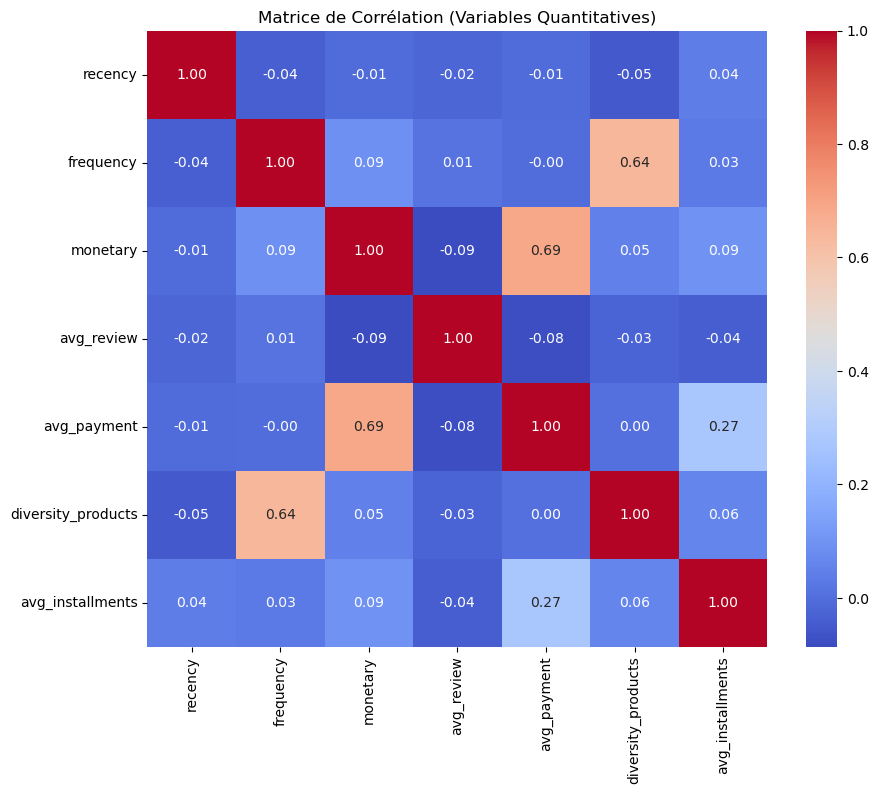

In [151]:
df_quanti = df_final[var_quanti]

# Calcul de la matrice de corrélation (Pearson)
corr_matrix = df_quanti.corr(method='pearson')
print("Matrice de corrélation :")
print(corr_matrix)

# Visualisation de la matrice de corrélation avec un heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Matrice de Corrélation (Variables Quantitatives)")
plt.show()

## Normalisation des variables quantitatives

In [153]:
# Définition des features
# La variable has_review ne sera ni normalisée ni standardisée car variable binaire 
quantitative_features = ['recency', 'frequency', 'monetary', 'avg_review', 'avg_payment', 'diversity_products', 'avg_installments']
nominal_features = ['customer_state', 'top_category']

In [154]:
# Standardisation uniquement des variables quantitatives
scaler = StandardScaler()

# Application du scaling aux variables quantitatives
df_scaled = scaler.fit_transform(df_final[quantitative_features])

# Conversion en DataFrame
df_scaled = pd.DataFrame(df_scaled, columns=quantitative_features)

# Ajout direct de la variable binaire 'has_review' sans transformation
df_scaled['has_review'] = df_final['has_review'].values

## *Encodage des variables qualitatives*

Customer_state et top_category seront one_hot_encodé 

In [157]:
# Encodage One-Hot des variables catégorielles
onehot_encoder = OneHotEncoder(sparse_output=False, drop='first')
df_nominal_encoded = onehot_encoder.fit_transform(df_final[nominal_features])

# Récupération des noms de colonnes après encodage
nominal_encoded_columns = onehot_encoder.get_feature_names_out(nominal_features)

# Conversion en DataFrame
df_nominal_encoded = pd.DataFrame(df_nominal_encoded, columns=nominal_encoded_columns)


In [158]:
# Réinitialisation des index pour assurer la cohérence
df_scaled.reset_index(drop=True, inplace=True)
df_nominal_encoded.reset_index(drop=True, inplace=True)


In [159]:
# Concatenation des DataFrames
df_final_encoded = pd.concat([df_scaled, df_nominal_encoded], axis=1)

In [160]:
# Afficher les 10 premiers identifiants pour vérifier l'ordre
print(df_final['customer_unique_id'].head(10))

df_final_encoded['customer_unique_id'] = df_final['customer_unique_id'].values

# Vérifier que les identifiants dans df_final_encoded correspondent à ceux de df_final
print(df_final_encoded['customer_unique_id'].head(10))

s1 = df_final['customer_unique_id'].head(10)
s2 = df_final_encoded['customer_unique_id'].head(10)
print(s1.equals(s2))

0    861eff4711a542e4b93843c6dd7febb0
1    290c77bc529b7ac935b93aa66c333dc3
2    060e732b5b29e8181a18229c7b0b2b5e
3    259dac757896d24d7702b9acbbff3f3c
4    345ecd01c38d18a9036ed96c73b8d066
5    4c93744516667ad3b8f1fb645a3116a4
6    addec96d2e059c80c30fe6871d30d177
7    57b2a98a409812fe9618067b6b8ebe4f
8    1175e95fb47ddff9de6b2b06188f7e0d
9    9afe194fb833f79e300e37e580171f22
Name: customer_unique_id, dtype: object
0    861eff4711a542e4b93843c6dd7febb0
1    290c77bc529b7ac935b93aa66c333dc3
2    060e732b5b29e8181a18229c7b0b2b5e
3    259dac757896d24d7702b9acbbff3f3c
4    345ecd01c38d18a9036ed96c73b8d066
5    4c93744516667ad3b8f1fb645a3116a4
6    addec96d2e059c80c30fe6871d30d177
7    57b2a98a409812fe9618067b6b8ebe4f
8    1175e95fb47ddff9de6b2b06188f7e0d
9    9afe194fb833f79e300e37e580171f22
Name: customer_unique_id, dtype: object
True


In [161]:
display(df_final_encoded.head())

,recency,frequency,monetary,avg_review,avg_payment,diversity_products,avg_installments,has_review,customer_state_AL,customer_state_AM,customer_state_AP,customer_state_BA,customer_state_CE,customer_state_DF,customer_state_ES,customer_state_GO,customer_state_MA,customer_state_MG,customer_state_MS,customer_state_MT,...,top_category_la_cuisine,top_category_luggage_accessories,top_category_market_place,top_category_music,top_category_musical_instruments,top_category_office_furniture,top_category_party_supplies,top_category_perfumery,top_category_pet_shop,top_category_security_and_services,top_category_signaling_and_security,top_category_small_appliances,top_category_small_appliances_home_oven_and_coffee,top_category_sports_leisure,top_category_stationery,top_category_tablets_printing_image,top_category_telephony,top_category_toys,top_category_watches_gifts,customer_unique_id
0,1.501612,-0.22174,-0.141884,-0.017218,-0.097329,-0.22585,-0.343938,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,861eff4711a542e4b93843c6dd7febb0
1,-0.069928,-0.22174,-0.028890,0.705636,0.612426,-0.22585,1.848680,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,290c77bc529b7ac935b93aa66c333dc3
2,-0.898085,-0.22174,-0.135377,0.705636,-0.056462,-0.22585,1.483244,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,060e732b5b29e8181a18229c7b0b2b5e
3,-0.461183,-0.22174,-0.126050,0.705636,0.002129,-0.22585,-0.709375,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,259dac757896d24d7702b9acbbff3f3c
4,-1.361070,-0.22174,-0.078752,0.705636,0.299224,-0.22585,1.848680,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,345ecd01c38d18a9036ed96c73b8d066


In [162]:
print(df_final_encoded['has_review'].value_counts())

has_review
1    118146
0       997
Name: count, dtype: int64


In [163]:
print(df_final_encoded.shape)

(119143, 106)


In [164]:
display(df_final_encoded.dtypes)

recency                                float64
frequency                              float64
monetary                               float64
avg_review                             float64
avg_payment                            float64
                                        ...   
top_category_tablets_printing_image    float64
top_category_telephony                 float64
top_category_toys                      float64
top_category_watches_gifts             float64
customer_unique_id                      object
Length: 106, dtype: object

In [165]:
print(df_final.index.equals(df_final_encoded.index))  # Doit renvoyer True si l'ordre est resté identique

True


In [166]:
df_final.to_csv('df_final.csv', index=False)
df_final_encoded.to_csv('df_final_encoded.csv', index=False)
print("DataFrames enregistrés avec succès")

DataFrames enregistrés avec succès


In [167]:
#Formater notebook en convention PEP 8, commande Shell donc ! devant
!nbqa black "Laroze_Cervetti_Projet5_Analyse exploratoire.ipynb"

reformatted Laroze_Cervetti_Projet5_Analyse exploratoire.ipynb



All done! \u2728 \U0001f370 \u2728

1 file reformatted.

